In [2]:
import pandas as pd

In [4]:
df = pd.read_parquet('environments/data/sp500_rl_ready_cleaned.parquet')

In [5]:
df.shape

(264447, 54)

In [7]:
df.head()

,date,ticker,open,high,low,close,adj_close,volume,returns,log_returns,...,volatility_5d_norm,volatility_20d_norm,market_volatility_norm,volume_norm,macd_norm,macd_signal_norm,macd_histogram_norm,market_return_norm,excess_returns_norm,market_momentum_norm
1,1990-01-03 00:00:00-05:00,ABT,1.646797,1.655699,1.637896,1.649765,1.649765,6114490,0.003610,0.003603,...,0.000000,0.0,2.463896,-0.270592,-0.142456,-0.154053,0.001603,-0.425697,0.504620,0.0
2,1990-01-04 00:00:00-05:00,ABT,1.652732,1.655699,1.631962,1.646798,1.646798,6476263,-0.001798,-0.001800,...,0.000000,0.0,0.650659,-0.166299,-0.142545,-0.154050,0.001327,-0.500063,0.215238,0.0
3,1990-01-05 00:00:00-05:00,ABT,1.640863,1.643831,1.623060,1.628995,1.628995,3382484,-0.010811,-0.010869,...,0.000000,0.0,-0.197333,-1.344782,-0.143621,-0.154442,-0.000819,-1.195355,0.155380,0.0
4,1990-01-08 00:00:00-05:00,ABT,1.622432,1.640327,1.616468,1.637345,1.637345,6631308,0.005126,0.005113,...,0.000000,0.0,-0.126778,-0.123375,-0.143652,-0.154679,-0.000249,0.865993,-0.353701,0.0
5,1990-01-09 00:00:00-05:00,ABT,1.634362,1.652257,1.628398,1.631380,1.631380,6932488,-0.003643,-0.003650,...,-0.854591,0.0,0.209552,-0.042787,-0.144062,-0.154951,-0.000724,-1.294472,0.685052,0.0


In [8]:
df.columns

Index(['date', 'ticker', 'open', 'high', 'low', 'close', 'adj_close', 'volume',
       'returns', 'log_returns', 'sma_5', 'sma_20', 'sma_50', 'volatility_5d',
       'volatility_20d', 'rsi', 'bb_middle', 'bb_upper', 'bb_lower',
       'bb_position', 'macd', 'macd_signal', 'macd_histogram', 'vwap',
       'high_low_pct', 'market_return', 'market_volatility', 'excess_returns',
       'market_momentum', 'open_norm', 'high_norm', 'low_norm', 'close_norm',
       'adj_close_norm', 'sma_5_norm', 'sma_20_norm', 'sma_50_norm',
       'bb_upper_norm', 'bb_lower_norm', 'bb_middle_norm', 'vwap_norm',
       'rsi_norm', 'bb_position_norm', 'high_low_pct_norm',
       'volatility_5d_norm', 'volatility_20d_norm', 'market_volatility_norm',
       'volume_norm', 'macd_norm', 'macd_signal_norm', 'macd_histogram_norm',
       'market_return_norm', 'excess_returns_norm', 'market_momentum_norm'],
      dtype='object')

In [15]:
len(df['ticker'].unique())

30

In [16]:
# Check if data is sorted by date
print("Is sorted by date?")
print(df['date'].is_monotonic_increasing)

# Check if data is sorted by ticker then date
print("\nIs sorted by ticker then date?")
print(df.sort_values(['ticker', 'date']).equals(df))

# Check if data is sorted by date then ticker
print("\nIs sorted by date then ticker?")
print(df.sort_values(['date', 'ticker']).equals(df))

# Look at the first few rows to see the pattern
print("\nFirst 10 rows (date and ticker only):")
print(df[['date', 'ticker']].head(10))

# Check date range for first ticker vs all data
first_ticker = df['ticker'].iloc[0]
print(f"\nDate range for first ticker ({first_ticker}):")
first_ticker_data = df[df['ticker'] == first_ticker]
print(f"Min date: {first_ticker_data['date'].min()}")
print(f"Max date: {first_ticker_data['date'].max()}")
print(f"Rows: {len(first_ticker_data)}")

print(f"\nOverall date range:")
print(f"Min date: {df['date'].min()}")
print(f"Max date: {df['date'].max()}")

Is sorted by date?
False

Is sorted by ticker then date?
False

Is sorted by date then ticker?
False

First 10 rows (date and ticker only):
                        date ticker
1  1990-01-03 00:00:00-05:00    ABT
2  1990-01-04 00:00:00-05:00    ABT
3  1990-01-05 00:00:00-05:00    ABT
4  1990-01-08 00:00:00-05:00    ABT
5  1990-01-09 00:00:00-05:00    ABT
6  1990-01-10 00:00:00-05:00    ABT
7  1990-01-11 00:00:00-05:00    ABT
8  1990-01-12 00:00:00-05:00    ABT
9  1990-01-15 00:00:00-05:00    ABT
10 1990-01-16 00:00:00-05:00    ABT

Date range for first ticker (ABT):
Min date: 1990-01-03 00:00:00-05:00
Max date: 2024-12-31 00:00:00-05:00
Rows: 8816

Overall date range:
Min date: 1990-01-03 00:00:00-05:00
Max date: 2024-12-31 00:00:00-05:00


In [ ]:
# Check if there are any ordering issues within each ticker
print("Checking date ordering within each ticker:")
date_issues = []
for ticker in df['ticker'].unique():
    ticker_data = df[df['ticker'] == ticker]
    if not ticker_data['date'].is_monotonic_increasing:
        date_issues.append(ticker)

if date_issues:
    print(f"Tickers with non-monotonic dates: {date_issues}")
else:
    print("All tickers have monotonic date ordering")

# Check if tickers are grouped together (but maybe not in alphabetical order)
print("\nChecking ticker grouping:")
ticker_transitions = []
current_ticker = None
for i, ticker in enumerate(df['ticker']):
    if ticker != current_ticker:
        ticker_transitions.append((i, ticker))
        current_ticker = ticker

print(f"Number of ticker transitions: {len(ticker_transitions)}")
print("First few ticker transitions:")
for i, (idx, ticker) in enumerate(ticker_transitions[:10]):
    print(f"  Row {idx}: {ticker}")

# Check if we have exactly 30 groups (one per ticker)
if len(ticker_transitions) == 30:
    print("\n✓ Data is grouped by ticker (30 distinct groups)")
    print("Order appears to be: ticker-grouped, with dates ascending within each ticker")
else:
    print(f"\n⚠ Expected 30 ticker groups, but found {len(ticker_transitions)}")
    
# Verify the structure
print(f"\nData structure verification:")
print(f"Total rows: {len(df):,}")
print(f"Unique tickers: {df['ticker'].nunique()}")
print(f"Average rows per ticker: {len(df) \ df['ticker'].nunique():.1f}")


Checking date ordering within each ticker:
All tickers have monotonic date ordering

Checking ticker grouping:
Number of ticker transitions: 30
First few ticker transitions:
  Row 0: ABT
  Row 8816: AXP
  Row 17632: BA
  Row 26448: BAC
  Row 35264: C
  Row 44080: CAT
  Row 52896: COP
  Row 61712: CVX
  Row 70528: D
  Row 79344: DD

✓ Data is grouped by ticker (30 distinct groups)
Order appears to be: ticker-grouped, with dates ascending within each ticker

Data structure verification:
Total rows: 264,447
Unique tickers: 30
Average rows per ticker: 8814.9


In [6]:
ranges = df.select_dtypes(include='number').max() - df.select_dtypes(include='number').min()

print("Value range (max - min) for each column:\n", ranges)

# If you want to print min and max separately:
print("\nMin values:\n", df.min())
print("\nMax values:\n", df.max())

Value range (max - min) for each column:
 open                      4.634008e+02
high                      4.647388e+02
low                       4.608812e+02
close                     4.639559e+02
adj_close                 4.639559e+02
volume                    1.226758e+09
returns                   9.684941e-01
log_returns               9.510132e-01
sma_5                     4.604926e+02
sma_20                    4.509342e+02
sma_50                    4.357892e+02
volatility_5d             3.526528e-01
volatility_20d            1.858182e-01
rsi                       1.000000e+02
bb_middle                 4.509342e+02
bb_upper                  4.735164e+02
bb_lower                  4.373361e+02
bb_position               2.064323e+00
macd                      7.566001e+01
macd_signal               6.539141e+01
macd_histogram            2.583952e+01
vwap                      4.501062e+02
high_low_pct              1.000000e+00
market_return             2.444024e-01
market_volatility     

In [7]:
value_ranges = {col: [df[col].min(), df[col].max()] for col in df.columns}


In [8]:
value_ranges

{'date': [Timestamp('1990-01-03 00:00:00-0500', tz='America/New_York'),
  Timestamp('2024-12-31 00:00:00-0500', tz='America/New_York')],
 'ticker': ['ABT', 'XOM'],
 'open': [np.float64(0.04601577564675091), np.float64(463.4467798855468)],
 'high': [np.float64(0.047719942637314834), np.float64(464.78650009669735)],
 'low': [np.float64(0.0448790109394033), np.float64(460.9260800009118)],
 'close': [np.float64(0.04658383131027222), np.float64(464.00250244140625)],
 'adj_close': [np.float64(0.04658383131027222),
  np.float64(464.00250244140625)],
 'volume': [np.int64(33800), np.int64(1226791300)],
 'returns': [np.float64(-0.3902440861772972), np.float64(0.578249970486737)],
 'log_returns': [np.float64(-0.4946965431669199),
  np.float64(0.4563166195656054)],
 'sma_5': [np.float64(0.04845840856432915), np.float64(460.5410461425781)],
 'sma_20': [np.float64(0.05163951888680458), np.float64(450.9858123779297)],
 'sma_50': [np.float64(0.05263367936015129), np.float64(435.84182006835937)],
 'vol

In [11]:
df['open'].max()

np.float64(463.4467798855468)

In [13]:
df['ticker'].unique()

array(['ABT', 'AXP', 'BA', 'BAC', 'C', 'CAT', 'COP', 'CVX', 'D', 'DD',
       'GE', 'HD', 'HPQ', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MRK',
       'MSFT', 'ORCL', 'PEP', 'PFE', 'PG', 'SO', 'WFC', 'WMT', 'XOM',
       'CSCO'], dtype=object)

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("varibad_phase2_1755077805_all_trials.csv")

In [8]:
df = df["value"].sort_values()

In [10]:
df.tail()

96     43.395675
75     63.826112
47     77.439026
45     78.023656
46    121.714462
Name: value, dtype: float64

In [1]:
import pandas as pd
df = pd.read_csv("experiments/results/optuna_phase3_results/varibad_phase3_1755581439_all_trials.csv")

In [2]:
df.head()

,trial_number,state,value,datetime_start,datetime_complete,duration,param_seq_len,param_max_episodes,param_early_stopping_patience,param_early_stopping_min_delta,param_val_interval
0,0,COMPLETE,37.615324,2025-08-19 05:30:39.063942,2025-08-19 08:19:27.756218,10128.692276,200,2000,5,0.001,500
1,1,COMPLETE,19.659685,2025-08-19 05:30:39.066474,2025-08-19 07:43:49.869841,7990.803367,150,2000,5,0.001,200
2,2,COMPLETE,14.199942,2025-08-19 05:30:39.068159,2025-08-19 08:03:33.295458,9174.227299,150,4000,3,0.050,300
3,3,COMPLETE,24.879325,2025-08-19 05:30:39.069315,2025-08-19 10:24:54.258726,17655.189411,200,8000,5,0.050,200
4,4,COMPLETE,18.769718,2025-08-19 05:30:39.070900,2025-08-19 09:19:41.009125,13741.938225,120,6000,8,0.010,200


In [5]:
df_sorted = df.sort_values(by="value", ascending=True)

In [ ]:
df_sorted.head(25)

In [ ]:
import matplotlib.pyplot as plt

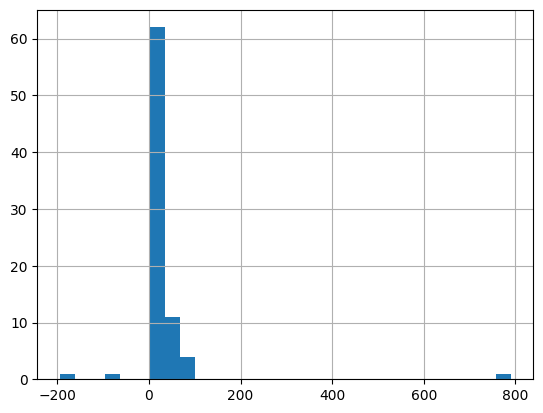

In [4]:
df["value"].hist(bins=30)
plt.show()

In [12]:
import optuna
print(optuna.__version__)

3.6.1


In [16]:
df = pd.read_parquet("environments/data/sp500_rl_ready_cleaned.parquet")

In [18]:
df.tail()

,date,ticker,open,high,low,close,adj_close,volume,returns,log_returns,...,volatility_5d_norm,volatility_20d_norm,market_volatility_norm,volume_norm,macd_norm,macd_signal_norm,macd_histogram_norm,market_return_norm,excess_returns_norm,market_momentum_norm
263515,2024-12-31 00:00:00-05:00,PG,164.192348,164.898722,163.436918,164.476852,164.476852,3957600.0,0.003351,0.003346,...,-0.117033,-0.461609,-1.101973,-0.895214,-1.628706,-1.082087,-1.954683,0.177425,0.042328,-0.699377
263516,2024-12-31 00:00:00-05:00,SO,81.064511,81.408670,80.287691,80.946510,80.946510,2987200.0,-0.000728,-0.000729,...,-0.912991,0.007837,-1.101973,0.158668,-3.281554,-3.778953,0.763206,0.177425,-0.217451,-0.699377
263517,2024-12-31 00:00:00-05:00,WFC,69.392900,69.776612,68.930476,69.107574,69.107574,7031500.0,-0.002415,-0.002417,...,-0.423965,-0.165126,-1.101973,-0.305726,-0.506983,-0.014174,-1.629923,0.177425,-0.324822,-0.699377
263518,2024-12-31 00:00:00-05:00,WMT,90.104116,90.472215,89.596737,89.885246,89.885246,11267700.0,-0.002429,-0.002432,...,0.664832,-0.058864,-1.101973,-1.369142,1.670826,4.209672,-7.898312,0.177425,-0.325749,-0.699377
263519,2024-12-31 00:00:00-05:00,XOM,104.268430,105.967448,103.885415,105.643356,105.643356,12387800.0,0.017114,0.016969,...,-0.423317,-0.526509,-1.101973,0.116085,-4.255483,-4.593842,0.054310,0.177425,0.918676,-0.699377
